# Lab Segmentation 2

In [ ]:
from commonfunctions import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

# Experiment 1

In [6]:
def getThreshold(img):

    img = img * 255
    img = img.astype(np.uint8)

    grey_levels = np.arange(256)
    hist = np.zeros(256)

    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            hist[img[i,j]] += 1

    num_pixels = np.sum(hist)
    sum_pixels = np.sum(grey_levels * hist)

    Tprev = 0
    Tinit = sum_pixels / num_pixels

    while abs(Tinit - Tprev) != 0:

        Tprev = Tinit

        num_pixels = np.sum(hist[:int(Tinit)])
        sum_pixels = np.sum(grey_levels[:int(Tinit)] * hist[:int(Tinit)])

        T_low = sum_pixels / num_pixels

        num_pixels = np.sum(hist[int(Tinit):])
        sum_pixels = np.sum(grey_levels[int(Tinit):] * hist[int(Tinit):])

        T_high = sum_pixels / num_pixels

        Tinit = (T_low + T_high) / 2

    
    return Tinit


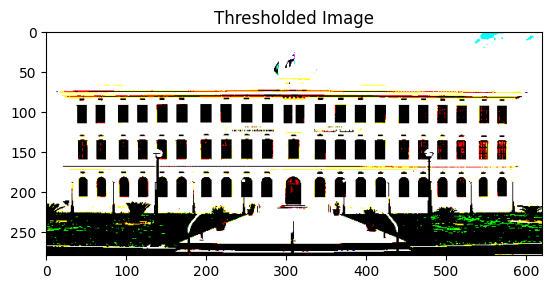

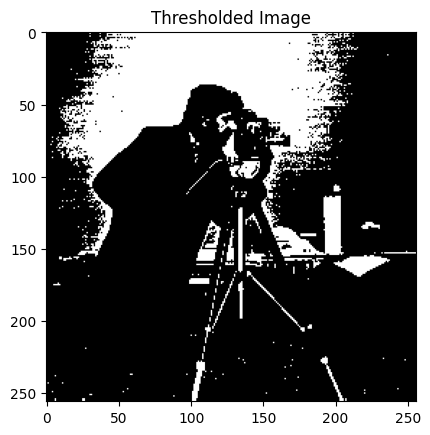

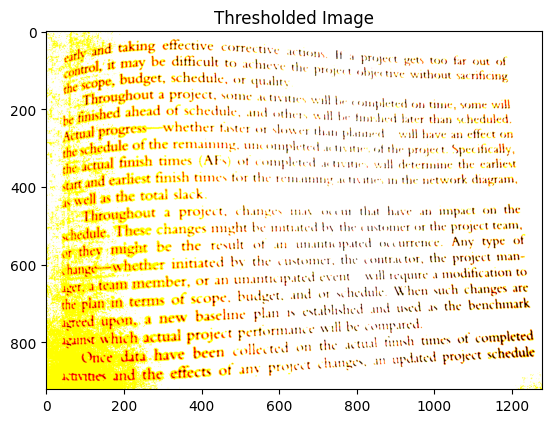

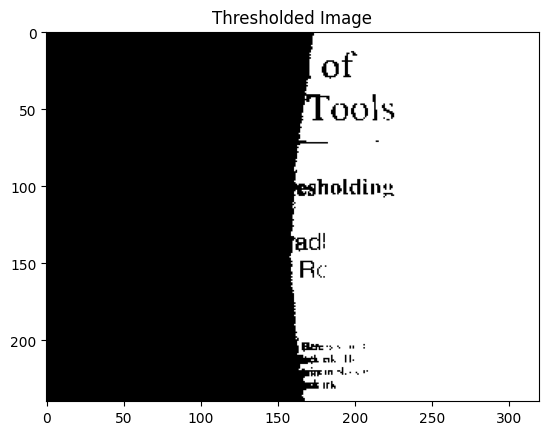

In [10]:
image_paths = [
    'cufe.png',
    'cameraman.png',
    'book1.png',
    'book.png'
]


for image_path in image_paths:
    image = io.imread(image_path)
    threshold = getThreshold(image)

    image[image < threshold] = 0
    image[image >= threshold] = 255

    show_images([image], ['Thresholded Image'])



# Experiment 2

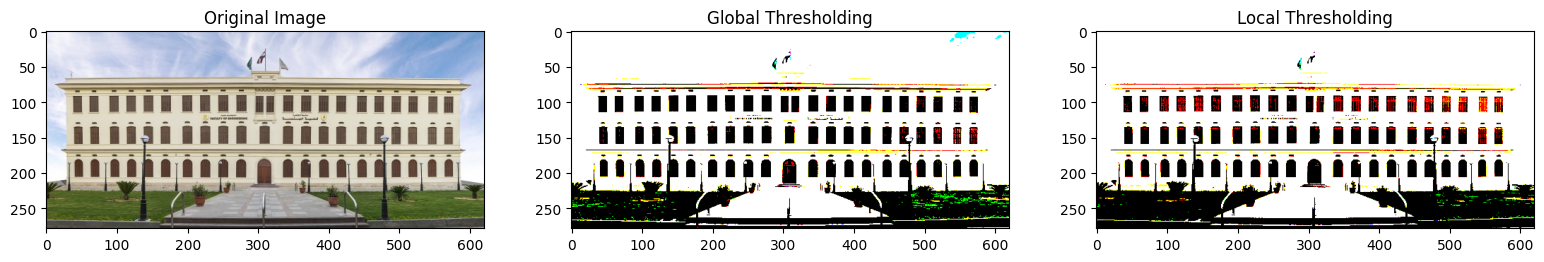

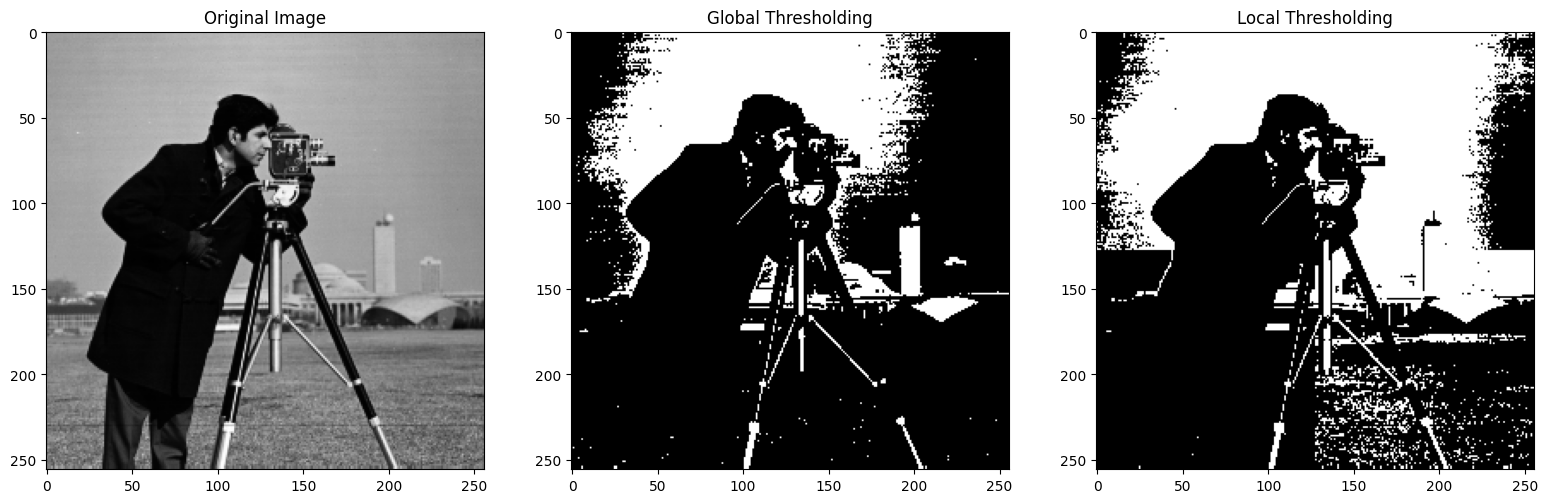

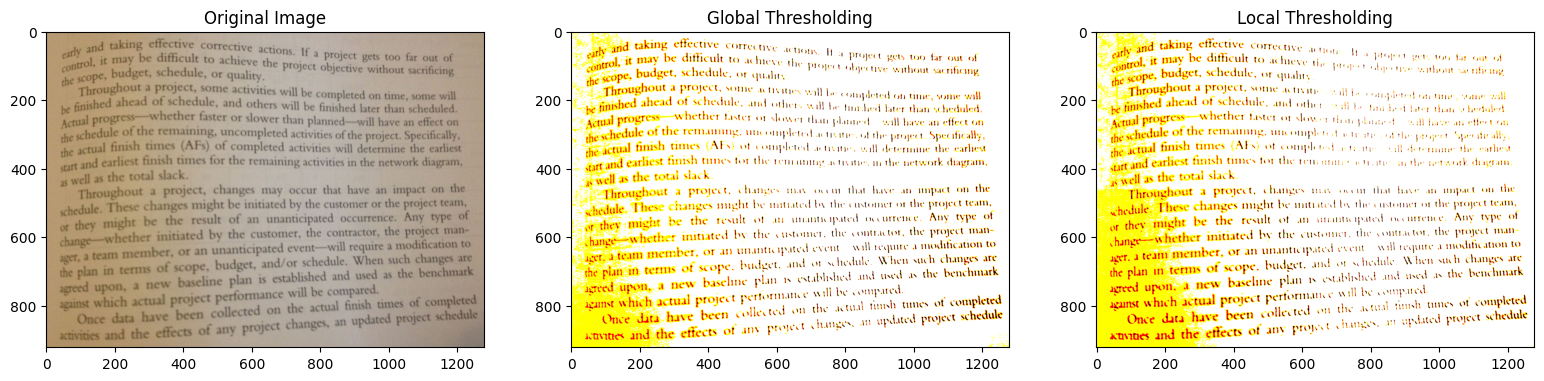

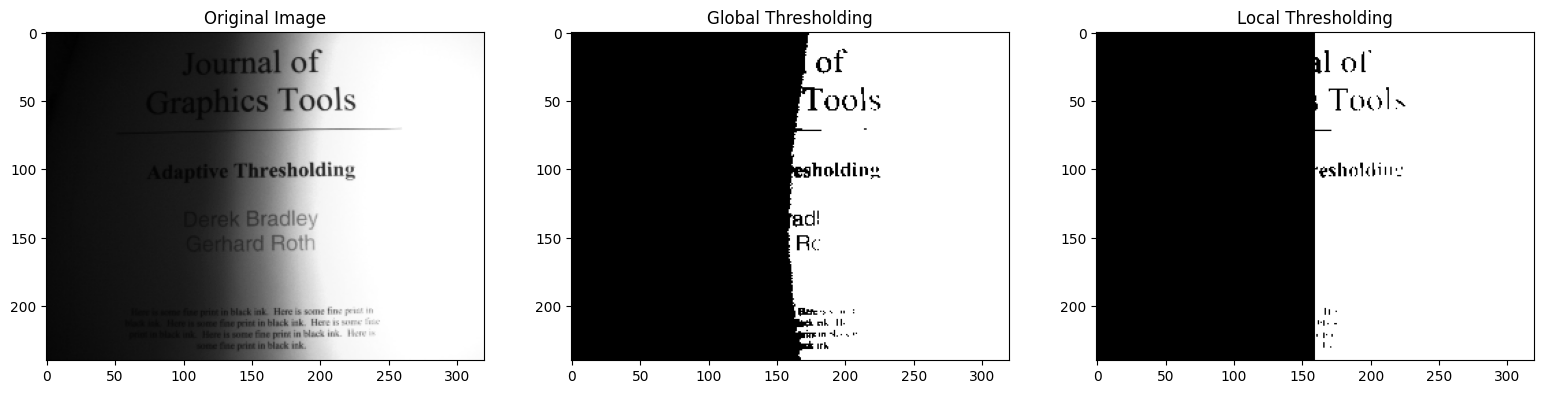

In [14]:
image_paths = [
    'cufe.png',
    'cameraman.png',
    'book1.png',
    'book.png'
]


def segmentImage(image, threshold):

    image[image < threshold] = 0
    image[image >= threshold] = 255

    return image


def global_thresholding(image, inplace = False):

    if(not inplace):
        im = image.copy()
    else:
        im = image

    threshold = getThreshold(im)
    segmentImage(im, threshold)

    return im


def local_thresholding(image):

    im = image.copy()

    quarters = [im[:im.shape[0]//2, :im.shape[1]//2], im[im.shape[0]//2:, :im.shape[1]//2], im[:im.shape[0]//2, im.shape[1]//2:], im[im.shape[0]//2:, im.shape[1]//2:]]

    for i in range(4):
        quarters[i] = global_thresholding(quarters[i], True)


    return im




for image_path in image_paths:

    image = io.imread(image_path)

    show_images([image, global_thresholding(image), local_thresholding(image)], ['Original Image', 'Global Thresholding', 'Local Thresholding'])
        

